## Exploratory Data
This notebook is intended to explore our dataset and look for different features.

In [3]:
from scripts.project_functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
sns.set_theme(style = "darkgrid",
              font_scale = 1.25)

In [5]:
df = load_and_process('../data/raw/combine_data.csv')
df

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,26.0,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,26.0,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,0.0,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,0.0,NaN,10.0,300.0
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,6.0,Carolina Panthers,1.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,Jesus Wilson,WR,69,189,4.57,NaN,10.0,119.0,NaN,4.57,2017,0.0,NaN,10.0,300.0
5878,Howard Wilson,CB,73,184,4.57,33.5,NaN,119.0,6.68,3.94,2017,0.0,Cleveland Browns,4.0,126.0
5879,Ahkello Witherspoon,CB,75,198,4.45,40.5,NaN,127.0,6.93,4.13,2017,3.0,San Francisco 49ers,3.0,66.0
5880,Xavier Woods,S,71,197,4.54,33.5,19.0,122.0,6.72,4.13,2017,3.0,Dallas Cowboys,6.0,191.0


Let's explore with describe.

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ht,5863.0,73.776735,2.630969,65.00,72.00,74.00,76.00,82.00
Wt,5863.0,243.569674,45.242802,149.00,206.00,233.00,281.00,375.00
Forty,5757.0,4.784415,0.306295,4.22,4.54,4.70,4.98,6.05
Vertical,4533.0,32.834547,4.213858,17.50,30.00,33.00,36.00,46.00
BenchReps,3959.0,21.030058,6.385965,2.00,17.00,21.00,25.00,49.00
BroadJump,4495.0,113.851168,9.321788,74.00,108.00,115.00,120.00,147.00
Cone,3807.0,7.285784,0.423223,6.34,6.97,7.19,7.54,9.12
Shuttle,3865.0,4.389483,0.269595,3.73,4.19,4.34,4.56,5.56
Year,5863.0,2008.524134,5.179289,2000.00,2004.00,2009.00,2013.00,2017.00
AV,5863.0,5.391097,7.665453,-4.00,0.00,2.00,8.00,51.00


We start with a height versus weight for all players

<AxesSubplot:xlabel='Ht', ylabel='Wt'>

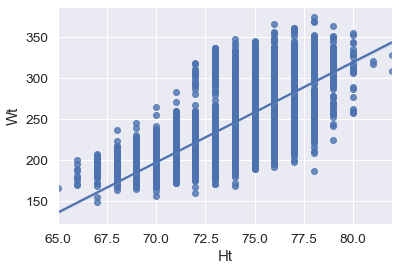

In [21]:
sns.regplot(x = 'Ht', y = 'Wt', data=df)

This is expected. There looks to be a positive correllation between height and weight. As height increases (the independent variable) so does weight.

Let's get a feel for which position of player is most represented in the data

<AxesSubplot:xlabel='Pos', ylabel='count'>

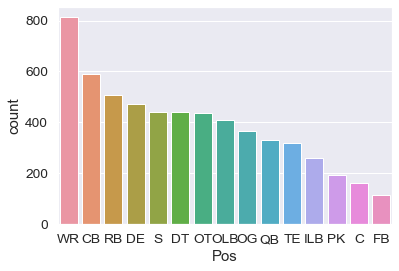

In [23]:
sns.countplot(x="Pos",
              data=df,
              order = df['Pos'].value_counts().index)

Wide receivers are the most represented position in our dataset. I think it is interested the cornerbacks are number 2. Typically cornerbacks are just as fast and quick as wide receivers but cannot catch as well.

Let's explore the height and weight of the different positions

<AxesSubplot:xlabel='Pos', ylabel='Ht'>

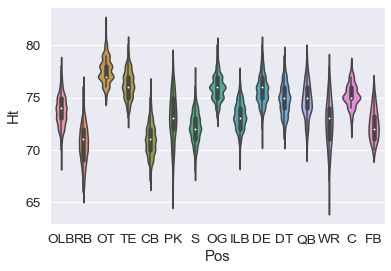

In [24]:
sns.violinplot(data = df, y = "Ht", x = "Pos")

I think there are too many positions here. Let's focus on Wide Receivers, Cornerbacks and Quarterbacks; we'll call this set 1.

<AxesSubplot:xlabel='Pos', ylabel='Ht'>

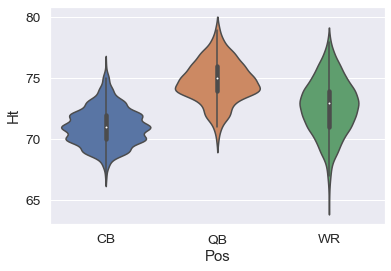

In [25]:
set1 = df[(df['Pos'] == 'WR') | (df['Pos'] == 'CB') | (df['Pos']=='QB')]
sns.violinplot(data = set1, y = "Ht", x = "Pos")

Wow. Look at the height distribution of the wide receiver especially compared to the cornerbacks. The CBs cover the wide receivers. The median height for WR is also a few inches more than the that of CBs.
QBs are typically taller than both CB and WR. Maybe this is so they can over their offensive line and see more of the field. Since height is correlated to weight, I'd image the violin plot with weight would look very similar. Why not do it?

<AxesSubplot:xlabel='Pos', ylabel='Wt'>

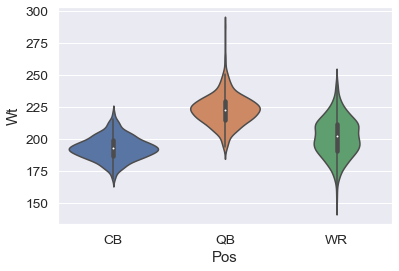

In [27]:
sns.violinplot(data = set1, y = "Wt", x = "Pos")

Yes it is pretty close. Wow, a nearly 300 pound quaterback? Interesting. Let's find it.

In [39]:
(df.loc[lambda x: x['Pos'] == 'QB']
    .loc[lambda x: x['Wt'] > 250])

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Team,Round,Pick
1448,Jared Lorenzen,QB,75,288,5.28,NaN,NaN,NaN,NaN,NaN,2004,0.0,NaN,10.0,300.0
2018,Bruce Eugene,QB,72,260,5.12,27.5,NaN,94.0,7.97,4.76,2006,0.0,NaN,10.0,300.0
2518,JaMarcus Russell,QB,77,265,4.83,NaN,NaN,NaN,NaN,NaN,2007,6.0,Oakland Raiders,1.0,1.0
3733,Jerrod Johnson,QB,77,251,4.75,29.0,NaN,119.0,7.28,4.31,2011,0.0,NaN,10.0,300.0
3767,Ryan Mallett,QB,79,253,5.37,24.0,NaN,103.0,NaN,NaN,2011,4.0,New England Patriots,3.0,74.0
5377,Cardale Jones,QB,77,253,4.81,36.0,NaN,NaN,NaN,NaN,2016,0.0,Buffalo Bills,4.0,139.0


There we go. Jared Lorenzen in the 2004 combine. He was not drafted. 
Interestingly, JaMarcus Russell is 265 pounds which looks to be the heaviest QB that was drafted between 2000-2017. He went first overall too!

Let's look at the average weight of all the positions.

In [37]:
average_weight_by_position = (df
.groupby(['Pos'])
.mean()['Wt']
.to_frame()
.reset_index() 
.sort_values(by=['Wt'],ascending=False))
average_weight_by_position

,Pos,Wt
8,OT,315.581236
6,OG,314.515068
3,DT,306.558824
0,C,302.598765
2,DE,268.507431
13,TE,254.621875
4,FB,244.655172
5,ILB,241.659004
7,OLB,240.367397
10,QB,222.924471


For fun, what is the heaviest player at the combine. I'll bet it was a Offensive lineman.

In [57]:
df['Wt'].argmax()


950

In [59]:
df.loc[950:950]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Team,Round,Pick
950,Mike Williams-01,OT,78,375,5.3,30.0,29.0,102.0,NaN,NaN,2002,20.0,Buffalo Bills,1.0,4.0


Yep, an offensive tackle that was picked 4th overall in 2002 by the Bills.

Let's explore draft picks and let's say quarterback's athletic performance. Let's get some benchmarks first.

In [69]:
QB_data = df[df['Pos']=='QB']
QB_data.describe()

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Round,Pick
count,331.000000,331.000000,326.000000,272.000000,18.000000,276.000000,257.000000,261.000000,331.000000,331.000000,331.000000,331.000000
mean,74.731118,222.924471,4.827147,31.172794,19.388889,110.213768,7.155914,4.320805,2008.317221,4.773414,6.332326,188.567976
std,1.690499,11.934558,0.178159,3.272032,4.174698,6.681967,0.253070,0.173894,5.001725,9.565406,3.493476,111.427966
min,70.000000,192.000000,4.330000,21.500000,11.000000,91.000000,6.550000,3.870000,2000.000000,-4.000000,1.000000,1.000000
25%,74.000000,215.000000,4.710000,29.000000,16.500000,106.000000,6.960000,4.190000,2004.000000,0.000000,3.000000,88.500000
50%,75.000000,223.000000,4.825000,31.000000,19.500000,110.000000,7.130000,4.320000,2008.000000,0.000000,6.000000,204.000000
75%,76.000000,229.500000,4.930000,33.500000,22.000000,114.000000,7.330000,4.450000,2012.000000,4.000000,10.000000,300.000000
max,79.000000,288.000000,5.370000,40.000000,26.000000,128.000000,7.970000,4.870000,2017.000000,51.000000,10.000000,300.000000


Let's take a look at some scatterplots

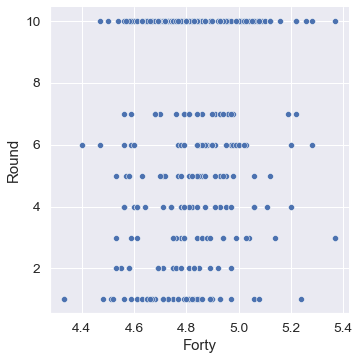

In [71]:
sns.relplot(x = "Forty", y = "Round", data = QB_data)

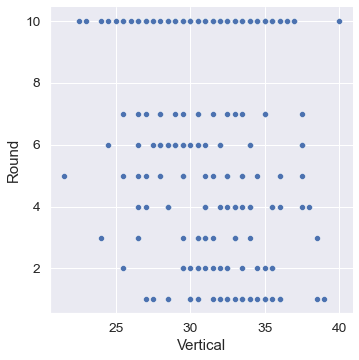

In [72]:
sns.relplot(x = "Vertical", y = "Round", data = QB_data)

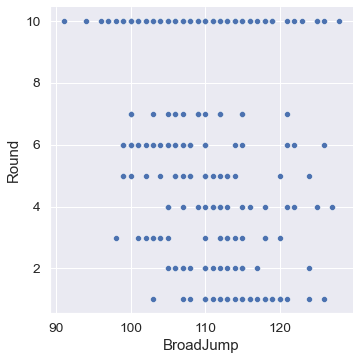

In [73]:
sns.relplot(x = "BroadJump", y = "Round", data = QB_data)

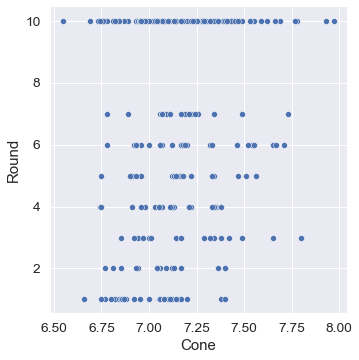

In [74]:
sns.relplot(x = "Cone", y = "Round", data = QB_data)

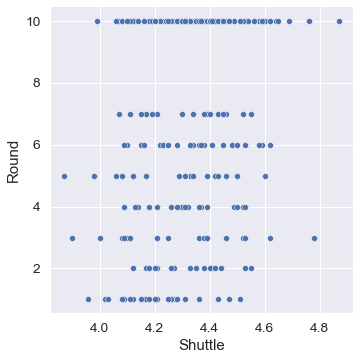

In [75]:
sns.relplot(x = "Shuttle", y = "Round", data = QB_data)

These seem pretty inconclusive. Note that the 10th round means that the player was not drafted. Yet in the case of the cone drill the fastest time was by an undrafted QB. I did not do the benchreps as this is more of a test for an lineman. I wonder if a weight average of some kind may give some insights?

Next, some more exploring using the pairplot. I am most interested in the round data.

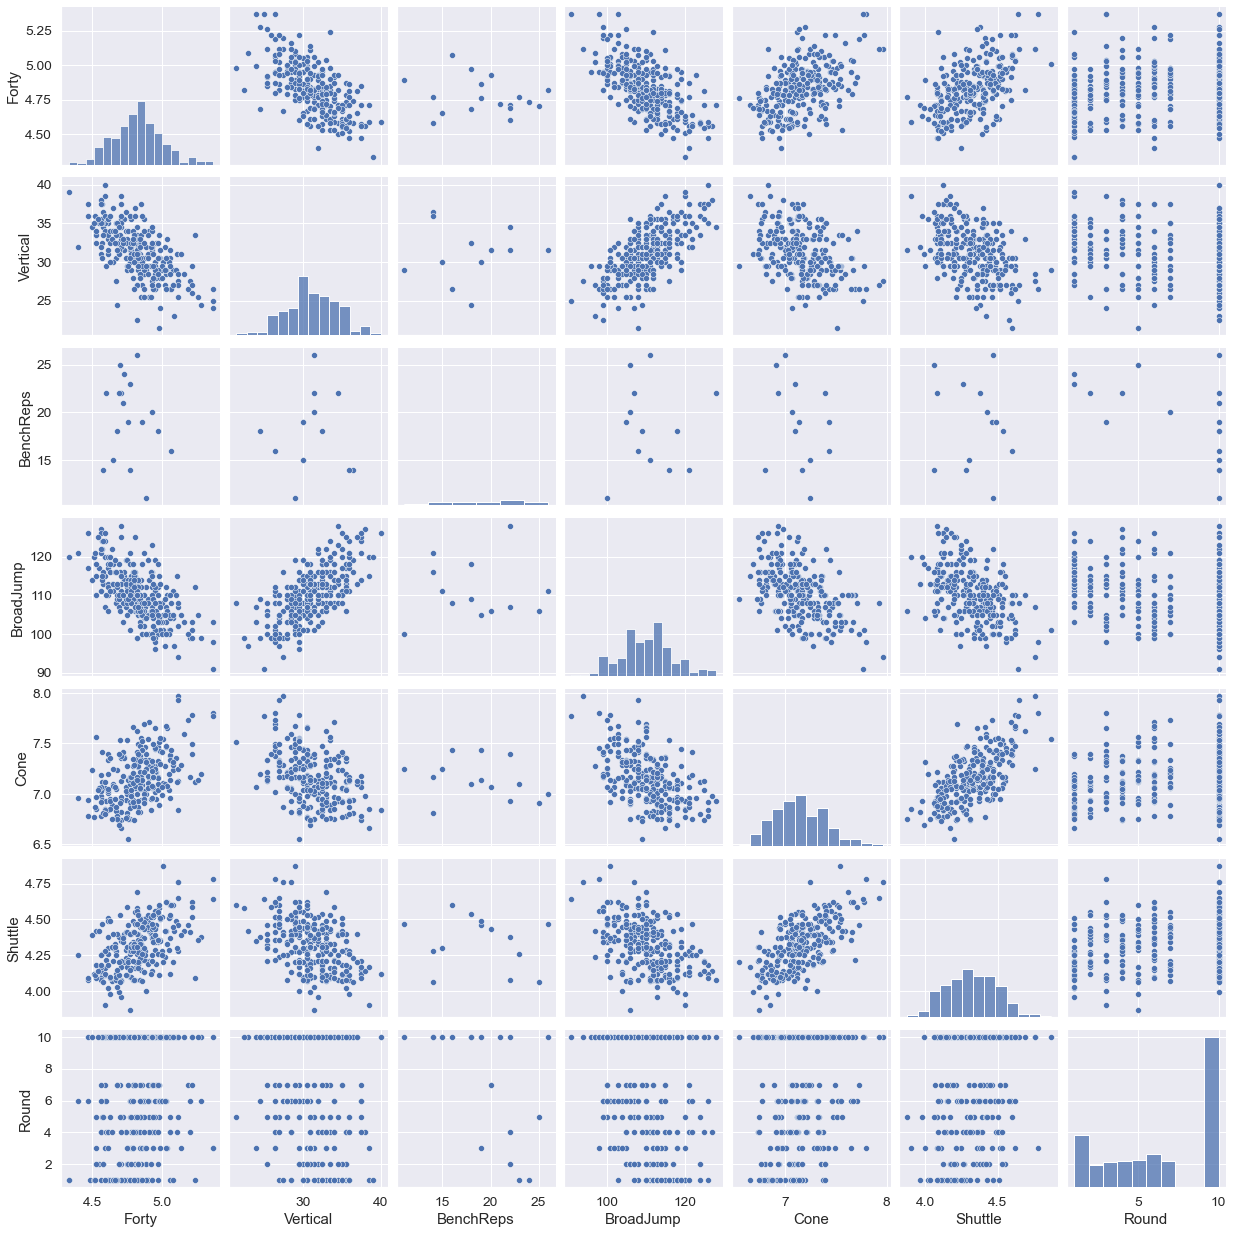

In [85]:
# I want the round column here
QBPair = QB_data.drop(['Year', 'AV', 'Team' ], axis=1)
sns.pairplot(data = QBPair.iloc[:,4:11])

I guess this is why it is called exploratory :-) Lots of interesting correlations here. Some correlations:
-Broadjump and vertical (jumping)
-Forty and the shuttle (agility)
-cone and shuttle (agility)

Interesting:
-Forty and Broadjump have a negative correlations


<AxesSubplot:>

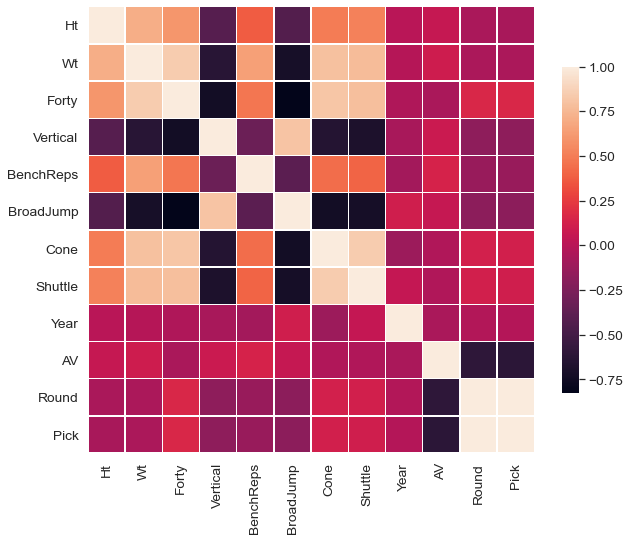

In [19]:
# corrolatio plot
# figured out how to make the plot bigger!
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr,square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.6})

Vertical and BroadJump are correlated. So are forty and weight, unfortunately smaller numbers are better in the forty. This means that heavier atheletes score higher forty times (and other agility tests), which makes sense. A 300 pound lineman isn't as fast as a 200 pound running back. The agility drills cone, shuffle and forty are correlated with each other whihc makes sense.